<a href="https://colab.research.google.com/github/PyBeginner1/MedicalInsuranceCostPrediction/blob/main/MedicalInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [100]:
insurance = pd.read_csv('/content/insurance.csv')

In [101]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [102]:
insurance.shape

(1338, 7)

Checking for null values

In [103]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Statistical Information about dataset

In [105]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Categorical Features:


*   Sex
*   Smoker
*   Region
  






In [106]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [107]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

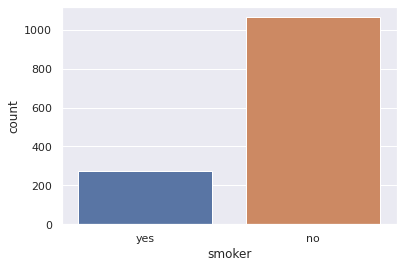

In [108]:
sns.countplot(x='smoker', data = insurance)

Sorting values by age

In [109]:
insurance['age'].value_counts().sort_index()

18    69
19    68
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

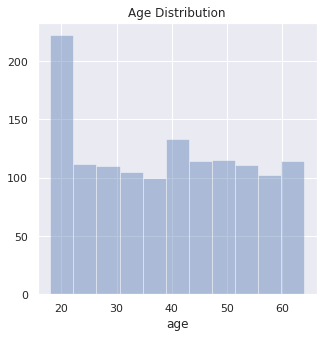

In [110]:
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance['age'], kde = False)
plt.title('Age Distribution')

In [111]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Use Countplot for categorical Data|

Text(0.5, 1.0, 'Sex Distribution')

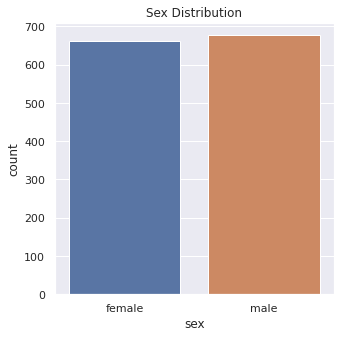

In [112]:
#gender distribution
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data = insurance)
plt.title('Sex Distribution')

Normal BMI Range ---> 18.5 to 24.9

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

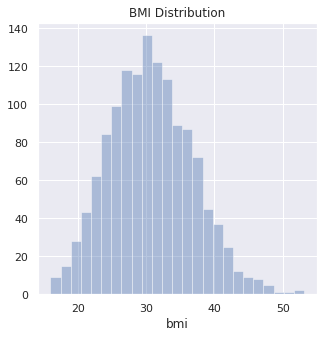

In [113]:
#bmi distribution
plt.figure(figsize=(5,5))
sns.distplot(insurance['bmi'],kde = False )
plt.title('BMI Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Children')

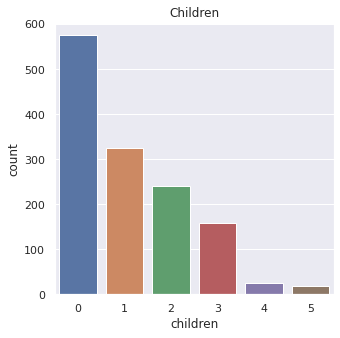

In [114]:
#children distr
plt.figure(figsize =(5,5))
sns.countplot(insurance['children'])
plt.title('Children')

In [115]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Smoker')

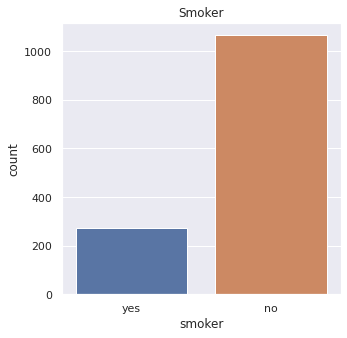

In [116]:
#smoker distribution
plt.figure(figsize =(5,5))
sns.countplot(insurance['smoker'])
plt.title('Smoker')

In [117]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region Distribution')

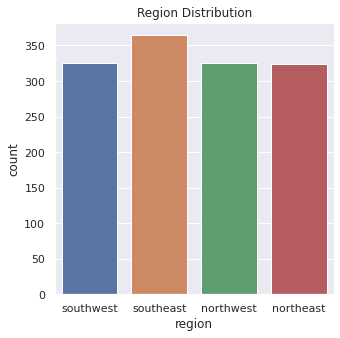

In [118]:
 #region
 plt.figure(figsize=(5,5))
 sns.countplot(x='region', data =insurance)
 plt.title('Region Distribution')

In [119]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charge Distribution')

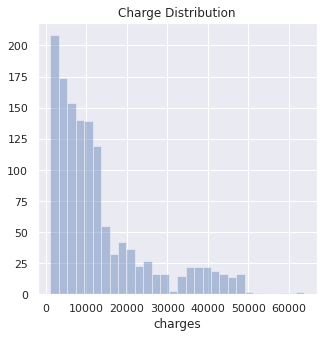

In [120]:
#charge
plt.figure(figsize=(5,5))
sns.distplot(insurance['charges'], kde = False)
plt.title('Charge Distribution')

Data Pre-Processing

Data Encoding

Encoding Sex Column 

Female ---> 1

Male ---> 0

In [121]:
insurance.replace({'sex':{'male': 0, 'female':1}}, inplace = True)

Smoker

In [122]:
insurance.replace({'smoker': {'yes': 0, 'no':1}}, inplace = True)

Region

In [123]:
insurance.replace({'region':{'southwest': 0,'southeast':1, 'northwest':2, 'northeast':3}}, inplace = True)

In [124]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Splitting Features & Target

In [125]:
X = insurance.drop('charges', axis =1 )
Y = insurance['charges']

In [126]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train & test split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model 

In [131]:
model = LinearRegression()

Model Training

In [132]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Evaluation

Training Model

In [137]:
train_accuracy = model.predict(X_train)


In [139]:
score = metrics.r2_score(Y_train,train_accuracy)
print('Score of training model is',score)

Score of training model is 0.7519923667088932


Testing Model

In [141]:
test_predict = model.predict(X_test)

In [142]:
score_1 = metrics.r2_score(Y_test,test_predict )
print('Score of testing model is' ,score_1) 


0.7445422986536503

In [147]:
input_data = (27,0,42.13,0,0,1)

#convert to numpy array
input_data_numpy = np.asarray(input_data)

#reshape
input_data_reshape = input_data_numpy.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print('The insurance cost is' ,prediction[0])

The insurance cost is 32197.690206901687
